## Self-Organizing Maps

In [ ]:
#%% Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#%% Importing the dataset

dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
#%% Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [ ]:
#%% Training the SOM

from minisom import MiniSom
som = MiniSom( x = 10, y = 10, input_len = 15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

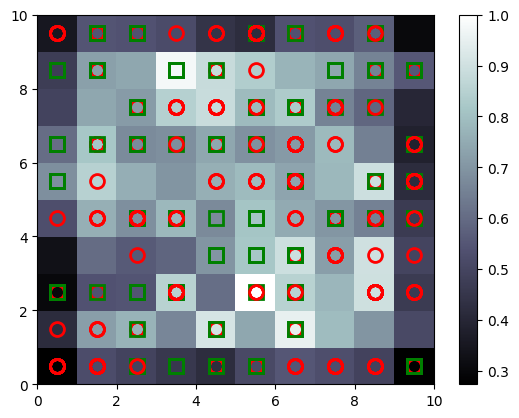

In [ ]:
#%% Visualizing the results

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [ ]:
#%% Finding the frauds

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
#%% Printing the Fraud Clients

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15761158
15605872
15665087
15644446
15803378
15714087
15730793
15788776
15746995
15764444
15671534
15777893
15667460
